In [1]:
import pandas as pd
import numpy as np
from datetime import datetime
import seaborn as sns

In [2]:
df = pd.read_csv("cleaned_dataframe.csv")
df.head()

,student_id,student_country,date_registered,purchase_id,purchase_type,date_purchased,days_taken,num_rated_courses,avg_rated_courses,avg_course_watched,total_time_watched,engagement_quizzes,engagement_exams,engagement_lessons,avg_exam_score,no_of_questions
0,258798,IN,2022-01-01,NaN,NaN,NaN,NaN,NaN,NaN,0.3,0.3,0.0,0.0,1.0,NaN,NaN
1,258799,CO,2022-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,258801,IN,2022-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,258802,US,2022-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,258804,BD,2022-01-01,NaN,NaN,NaN,NaN,NaN,NaN,14.2,14.2,1.0,0.0,1.0,NaN,NaN


as the columns purchase_id, purchase_type and date_purchased are related to target variable i.e. whether the student buys subsciptio nor not, we will drop those columns and replace these with one column with '1' and '0' as values, where '1' implies that student bought the subscription and '0' implies that the student did not bought the subscription.

In [3]:
df.date_purchased = pd.to_datetime(df.date_purchased)
df.date_purchased = df['date_purchased'].apply(lambda x : 0 if str(x)=='NaT' else 1 )
df.drop(columns=['purchase_id', 'purchase_type', 'days_taken', 'student_id'], inplace=True)
df.head()

,student_country,date_registered,date_purchased,num_rated_courses,avg_rated_courses,avg_course_watched,total_time_watched,engagement_quizzes,engagement_exams,engagement_lessons,avg_exam_score,no_of_questions
0,IN,2022-01-01,0,NaN,NaN,0.3,0.3,0.0,0.0,1.0,NaN,NaN
1,CO,2022-01-01,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,IN,2022-01-01,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,US,2022-01-01,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,BD,2022-01-01,0,NaN,NaN,14.2,14.2,1.0,0.0,1.0,NaN,NaN


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34163 entries, 0 to 34162
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   student_country     34151 non-null  object 
 1   date_registered     34163 non-null  object 
 2   date_purchased      34163 non-null  int64  
 3   num_rated_courses   647 non-null    float64
 4   avg_rated_courses   647 non-null    float64
 5   avg_course_watched  16671 non-null  float64
 6   total_time_watched  16671 non-null  float64
 7   engagement_quizzes  16846 non-null  float64
 8   engagement_exams    16846 non-null  float64
 9   engagement_lessons  16846 non-null  float64
 10  avg_exam_score      2589 non-null   float64
 11  no_of_questions     80 non-null     float64
dtypes: float64(9), int64(1), object(2)
memory usage: 3.1+ MB


There are plenty of missing values in the dataset, so, one by one, we will have to impute the missing values for every column.

#### 2.1 Missing value imputation for student_country column

In [5]:
df.student_country.isna().sum()

12

<AxesSubplot:>

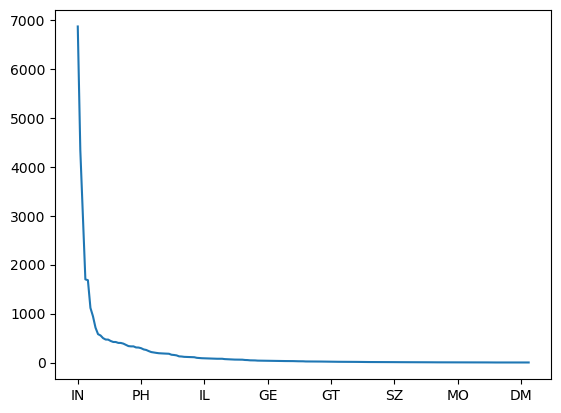

In [6]:
df.student_country.value_counts().plot()

There are only 12 missing values in the student_country column. Also, as seen from the plot above, students from 'IN' are is high number and is many times greater than other countries. So, it is apt to do 'mode imputation' here and fill the missing values with 'IN' country value.

In [7]:
df.student_country.fillna('IN', inplace=True)

#### 2.2 Missing value imputation for 'num_rated_courses'

In [8]:
df[~df.num_rated_courses.isna()].num_rated_courses.value_counts()

1.0     551
2.0      66
3.0      15
5.0       6
4.0       3
7.0       2
9.0       2
11.0      1
13.0      1
Name: num_rated_courses, dtype: int64

Majority of the students who gave ratings to courses have mostly rated only 1 course followed by 2 courses and 3 courses. The rest are outliers. If the student hasn't given any rating to any of the course, the obivous value will be 0 for these. So, we will do a '0' value imputation for num_rated_courses.

In [9]:
df.num_rated_courses.fillna(0, inplace=True)

#### 2.3 Missing value imputation for avg_rated_courses

In [10]:
df[~df.avg_rated_courses.isna()].avg_rated_courses.value_counts()

5.000000    559
4.000000     57
3.000000     12
4.500000      5
3.500000      4
2.000000      3
4.800000      2
4.666667      2
4.333333      2
4.555556      1
Name: avg_rated_courses, dtype: int64

<AxesSubplot:xlabel='date_purchased', ylabel='avg_rated_courses'>

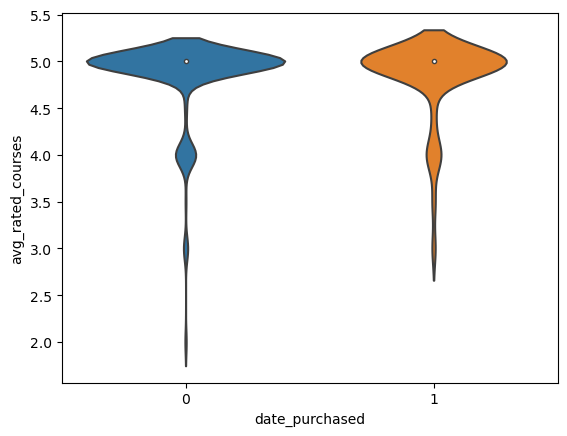

In [11]:
sns.violinplot(data=df, y="avg_rated_courses", x="date_purchased")

Only a small fraction of students have given ratings to course and it is mostly 5 start rating. It is evident from the violin plot above that the distribution or average ratings given by students is same for both types of students - those that eventually bought the course and those who didn't. To impute the missing values, it would be good to do weighted average missing value imputation. 

In [12]:
tempSeries = df[~df.avg_rated_courses.isna()].avg_rated_courses.value_counts()
weighted_average = np.average(tempSeries.index, weights=tempSeries.values)
df.avg_rated_courses.fillna(weighted_average, inplace=True)

#### 2.4 Missing value imputation for avg_course_watched

<AxesSubplot:>

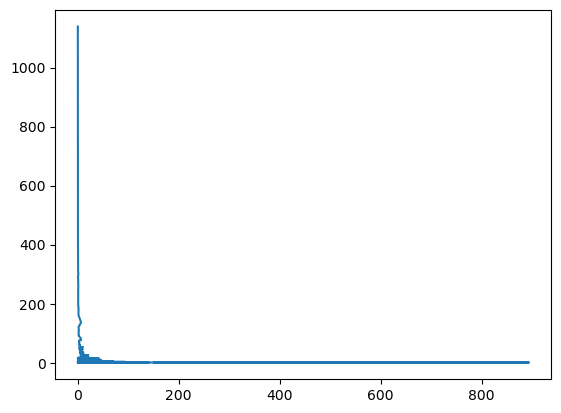

In [13]:
df.avg_course_watched.value_counts().plot()

<AxesSubplot:xlabel='date_purchased', ylabel='avg_course_watched'>

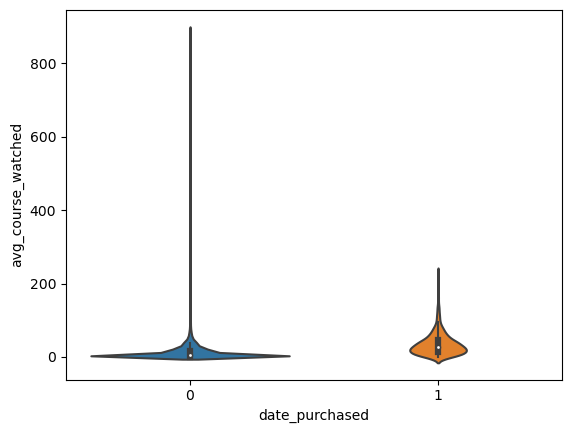

In [14]:
sns.violinplot(data=df, y='avg_course_watched', x='date_purchased')

As seen from above violin plot the distribution of the average course watched is slightly different for those that subscribed and those that didn't. This shows that it is an important feature for determining whether the student is going to buy the course or not. We need to impute the missing values in this feature in such a way that this difference in distribution stays the same. One way to do this is to use weighted average to impute the missing values. The weighted average in this case is calcualted based on the count. The value is the average duration course is watched and the weight is it's frequency in the dataset.

In [15]:
tempSeries1 = df[~df.avg_course_watched.isna()].avg_course_watched.value_counts()
weighted_average1 = np.average(tempSeries1.index, weights=tempSeries1.values)
df.avg_course_watched.fillna(weighted_average1, inplace=True)

<AxesSubplot:xlabel='date_purchased', ylabel='avg_course_watched'>

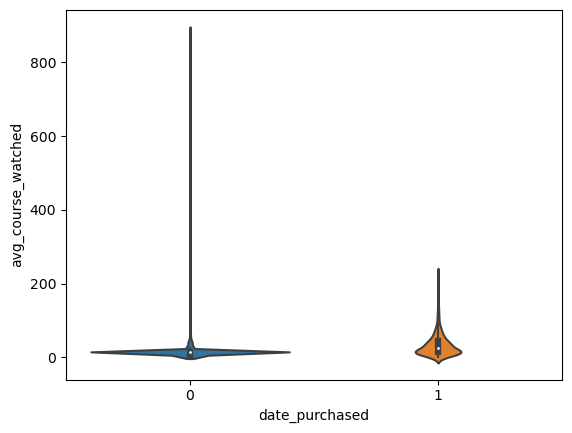

In [16]:
sns.violinplot(data=df, y='avg_course_watched', x='date_purchased')

As we can see, we have succeeded in preserving the difference in distribution of those that purchased the course and those that didn't while imputing the values for avg_course_watched feature.

#### 2.5 Missing value imputation for total_time_watched

In [17]:
print(f'Number of missing values for total_time_watched is {df.total_time_watched.isna().sum()}')
df.total_time_watched.value_counts()

Number of missing values for total_time_watched is 17492


0.1      1126
0.2       698
0.3       514
0.4       433
0.5       337
         ... 
225.3       1
297.7       1
339.9       1
107.9       1
82.6        1
Name: total_time_watched, Length: 1937, dtype: int64

In [18]:
# finding the number of students that didn't watch any course videos
df.total_time_watched.value_counts()[0.0]

1

Almost 50% of the data is missing. There are two ways that we can safely impute the data. One is to do 'zero imputation' this would imply that those students didn't watch any of the videos on platform which doesn't seem true as in our dataset the count for '0.0' minutes is only 1. 

So, we will rather opt for mode impuatation in this case, where we will fill the missing values in the dataset with 0.1 minutes.

<AxesSubplot:xlabel='date_purchased', ylabel='total_time_watched'>

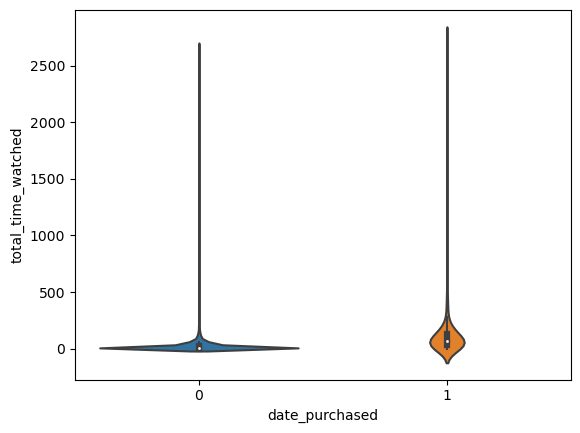

In [19]:
sns.violinplot(data=df, x='date_purchased', y='total_time_watched')

<AxesSubplot:xlabel='date_purchased', ylabel='total_time_watched'>

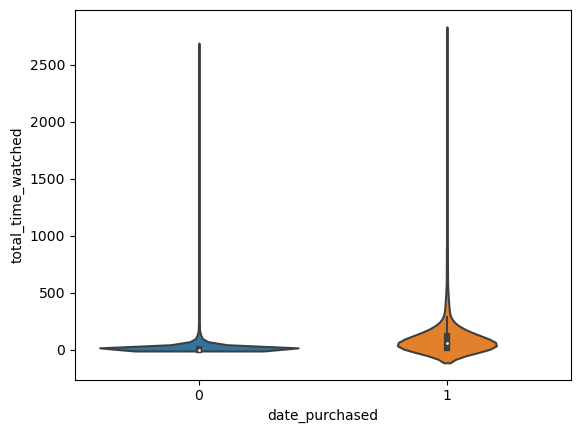

In [20]:
df.total_time_watched.fillna(0.1, inplace=True)
sns.violinplot(data=df, x='date_purchased', y='total_time_watched')

We have also been able to preserve the different distributions of the students who purchased and those who didn't reflected in the total_time_watched feature.

#### 2.6 Missing value impuatation for engagement_quizzes

In [21]:
df.engagement_quizzes.value_counts()

0.0     10626
1.0      4156
2.0      1343
3.0       437
4.0       140
5.0        55
6.0        22
7.0        17
8.0        12
10.0        9
11.0        9
13.0        8
9.0         5
12.0        4
16.0        2
14.0        1
Name: engagement_quizzes, dtype: int64

for the rows where engagement_quizzes is null, it is safe to assume that null value implies that student did not attempted any quiz and therefore it is 0. We will therefore fill all the na values with 0

In [29]:
df.engagement_quizzes.fillna(0,inplace=True)

#### 2.8 Missing value imputation for engagement_lessons

In [24]:
df.engagement_lessons.value_counts()

1.0     11722
2.0      2802
3.0      1023
4.0       480
5.0       241
0.0       178
6.0       121
7.0        79
8.0        41
9.0        28
11.0       20
10.0       20
12.0       19
13.0       13
14.0       11
15.0        7
16.0        7
24.0        6
25.0        5
19.0        5
20.0        4
18.0        4
21.0        4
17.0        4
27.0        1
30.0        1
Name: engagement_lessons, dtype: int64

Here null values imply that there was no engagement from the student with respect to lessons watched. So, we will replace all null values with 0

In [45]:
df.engagement_lessons.fillna(0, inplace=True)

#### 2.9 Missing value imputation for engagement_exams

In [32]:
df.engagement_exams.value_counts()

0.0     14292
1.0      1982
2.0       367
3.0        93
4.0        41
5.0        23
6.0        13
7.0         8
8.0         5
13.0        4
12.0        4
9.0         4
10.0        4
11.0        3
18.0        1
16.0        1
15.0        1
Name: engagement_exams, dtype: int64

Here, majority of non-null values have 0 as value which implies that majority of students didn't attempt any exam. So, we will impute the missing values with 0 value.

In [33]:
df.engagement_exams.fillna(0, inplace=True)

#### 2.10 Missing value imputation for avg_exam_score

In [40]:
df.avg_exam_score.isna().sum()

31574

For the avg_exam_score, only a small fraction of records have non-null values. In this case, we will replace null values with weighted average score where the weights are the frequency of those scores.

In [41]:
avg_score_series = df.avg_exam_score.value_counts()
weighted_avg_exam_score = np.average(avg_score_series.index, weights=avg_score_series.values)
df.avg_exam_score.fillna(weighted_avg_exam_score,inplace=True )

#### 2.11 Missing value imputation for no_of_questions

In [44]:
df.no_of_questions.value_counts()

1.0    65
2.0    10
3.0     2
4.0     2
9.0     1
Name: no_of_questions, dtype: int64

Null values in no_of_questions feature imply that the student hasn't asked any question on the question platform. So, we will simply replace all null values with 0. 

In [47]:
df.no_of_questions.fillna(0, inplace=True)

#### 2.12 Check for Data imbalance

<AxesSubplot:>

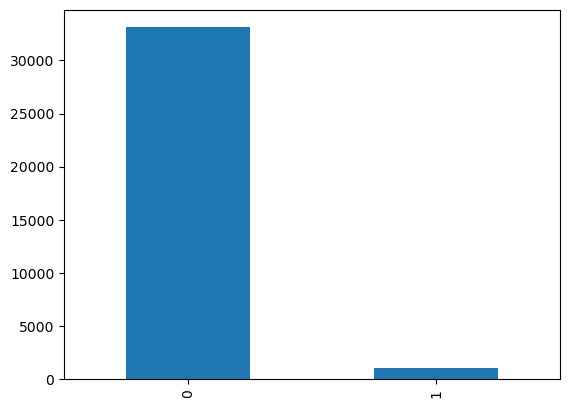

In [66]:
# rename column date_purchased to 'paid'
df.rename(columns={'date_purchased': 'paid'}, inplace=True)

The dataset is highly imbalanced. So, before proceeding, we will need to balance the dataset. 